# sklearn中的逻辑回归

In [1]:
import matplotlib.pyplot as plt
import numpy as np

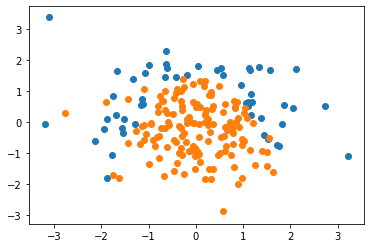

In [2]:
np.random.seed(666)
x = np.random.normal(0, 1, size = (200, 2))
y = np.array(x[:, 0]**2 + x[:, 1] < 1.5, dtype=int)
for _ in range(20):
    y[np.random.randint(200)] = 1

plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 666)

## 使用sklearn中的逻辑回归

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1, solver="lbfgs", verbose=2)
log_reg.fit(x_train, y_train)
log_reg.score(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


0.7933333333333333

In [5]:
log_reg.score(x_test, y_test)

0.86

In [6]:
# 边界绘制函数

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


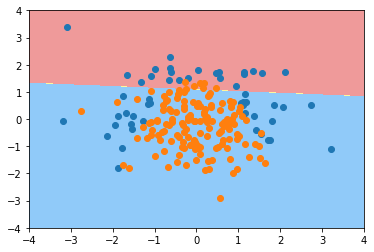

In [7]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## 使用多项式进行逻辑回归

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree)),
        ("std", StandardScaler()),
        ("log_reg", LogisticRegression(n_jobs=-1, solver="lbfgs"))
    ])

In [9]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [10]:
print("train score : ", poly_log_reg.score(x_train, y_train))
print("test score : ", poly_log_reg.score(x_test, y_test))

train score :  0.9066666666666666
test score :  0.94


D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


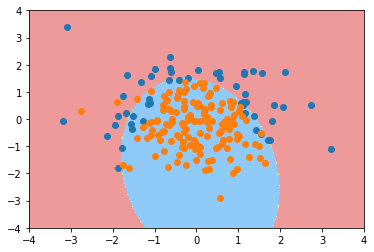

In [11]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## 过拟合现象与正则化的使用

In [22]:
def PolynomialLogisticRegression(degree, C, penalty="l2"):
    return Pipeline([
        ("poly", PolynomialFeatures(degree)),
        ("std", StandardScaler()),
        ("log_reg", LogisticRegression(n_jobs=-1, solver='liblinear', C = C, penalty=penalty)) # 正则化参数C
    ])

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


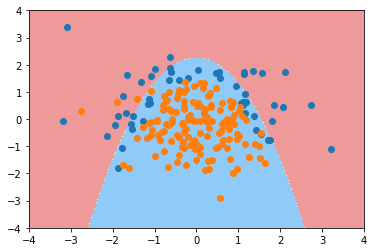

In [25]:
poly_log_reg_normal = PolynomialLogisticRegression(20, 0.08, "l1")
poly_log_reg_normal.fit(x_train, y_train)
plot_decision_boundary(poly_log_reg_normal, axis=[-4,4,-4,4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [26]:
print("train score : ", poly_log_reg_normal.score(x_train, y_train))
print("test score : ", poly_log_reg_normal.score(x_test, y_test))

train score :  0.8266666666666667
test score :  0.88


# 总结：

* 1、sklearn中的logistics regression已经包含的正则化操作，使用时直接设置参数即可
* 2、pipyline的使用
* 3、当degree过大时，会发生过拟合现象，此时必须加入正则化